To run the code:
1)write the Netlists in a .txt file
2)add the .txt file to the same folder that the notebook is saved in
3)write the .txt file name in the main as shown in the screenshot

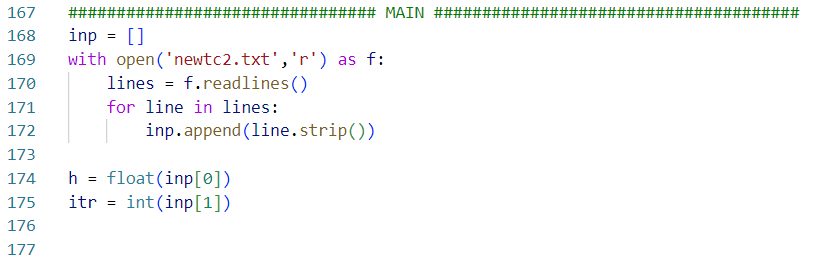

4) run the code and the results are shown in the terminal

In [2]:
import numpy as np

In [3]:
class Component:
    def __init__(self, type="<Unknown>", value=-1,left =int(),right=int(),initial = 0):
        self.type = type
        self.value = value
        self.left = left - 1
        self.right = right - 1
        self.initial = initial
        self.prev_values = float(initial)


In [4]:
############################ Functions ##############################

def G(comps : list[Component],size):  #size: number of nodes in circuit
    g = [[0 for _ in range(size)] for _ in range(size)]
    for comp in comps:
        if comp.type == 'R':
            if comp.left != -1 and comp.right != -1:
                g[comp.left][comp.left] = g[comp.left][comp.left] +(1/comp.value)
                g[comp.left][comp.right] = g[comp.left][comp.right] -(1/comp.value)
                g[comp.right][comp.left] = g[comp.right][comp.left] -(1/comp.value)
                g[comp.right][comp.right] = g[comp.right][comp.right] +(1/comp.value)
            elif comp.left == -1:
                g[comp.right][comp.right] = g[comp.right][comp.right] +(1/comp.value)
            elif comp.right == -1:
                g[comp.left][comp.left] = g[comp.left][comp.left] +(1/comp.value)
        if comp.type == 'C':
            if comp.left != -1 and comp.right != -1:
                g[comp.left][comp.left] = g[comp.left][comp.left] +(comp.value/h)
                g[comp.left][comp.right] = g[comp.left][comp.right] -(comp.value/h)
                g[comp.right][comp.left] = g[comp.right][comp.left] -(comp.value/h)
                g[comp.right][comp.right] = g[comp.right][comp.right] +(comp.value/h)
            elif comp.left == -1:
                g[comp.right][comp.right] = g[comp.right][comp.right] +(comp.value/h)
            elif comp.right == -1:
                g[comp.left][comp.left] = g[comp.left][comp.left] +(comp.value/h)
    return g

def B(comps:list[Component],n,m,i):   #n: number of nodes in circuit, m: number of indep voltage sources in the circuit, i : number of inductors in the circuit
    b = [[0 for _ in range(m+i)] for _ in range(n)]
    dummy=0
    dummy2=m
    for comp in comps:
        if comp.type=="Vsrc":
            if comp.left != -1 and comp.right != -1:
                b[comp.left][dummy]=1
                b[comp.right][dummy]=-1
                dummy=dummy+1
            elif comp.left!=-1:
                b[comp.left][dummy]=1
                dummy=dummy+1
            elif comp.right!=-1:
                b[comp.right][dummy]=-1
                dummy=dummy+1
        if comp.type == "I":
            if comp.left != -1 and comp.right != -1:
                b[comp.left][dummy2]=1
                b[comp.right][dummy2]=-1
                dummy2=dummy2+1
            elif comp.left!=-1:
                b[comp.left][dummy2]=1
                dummy2=dummy2+1
            elif comp.right!=-1:
                b[comp.right][dummy2]=-1
                dummy2=dummy2+1
    return b

def D(I_comps:list[Component],m,i):   # m: number of indep voltage sources in the circuit
    d = [[0 for _ in range(m+i)] for _ in range(m+i)]
    c = m
    for In in I_comps:
        d[c][c] = -(In.value/h)
        c+=1 
    return d

def A(d:list[list],g:list[list],b:list[list],n,m,i):  #n: number of nodes in circuit, m: number of indep voltage sources in the circuit, i: number of inductors
    s=m+n+i
    a= [[0 for _ in range(s)] for _ in range(s)]
    bt=[[b[j][i] for j in range(len(b))] for i in range(len(b[0]))]
    for i in range(n):
        for j in range(n):
            a[i][j]=g[i][j]
    for i in range(n):
        c=0
        for j in range(n,s):
            a[i][j]=b[i][c]
            c=c+1
    r=0
    for i in range(n,s):
        if i!=n:
            r=r+1
        for j in range(n):
            a[i][j]=bt[r][j]
    r=0
    for i in range(n,s):
        c=0
        for j in range(n,s):
            a[i][j]= d[r][c]
            c+=1
        r+=1
    return a

""" [] 1
    [] 2
    [] 3
    [] V1
    [] I1 """
def Z(comps:list[Component],n,m,i): #n: number of indep current sources (nodes), m: number of indep voltage sources, i: number of inductors 
    z= [[0 for _ in range(1)] for _ in range(n+m+i)]
    ii=0
    iv=n
    i_in= n+m
    for comp in comps:
        if comp.type=="Isrc":
            if comp.left != -1 and comp.right != -1:
                z[comp.right][0]=-comp.value
                z[comp.left][0]=comp.value
            elif comp.right!=-1:
                z[comp.right][0]=-comp.value
            elif comp.left!=-1:
                z[comp.left][0]=comp.value
        elif comp.type=="Vsrc":
            z[iv][0]=comp.value
            iv=iv+1
        elif comp.type == "I":
            z[i_in][0]=-(comp.value/h)*comp.prev_values
            i_in+=1
        elif comp.type == "C":
            if comp.left != -1 and comp.right != -1:
                z[comp.right][0]=-(comp.value/h)*comp.prev_values
                z[comp.left][0]=(comp.value/h)*comp.prev_values
            elif comp.right!=-1:
                z[comp.right][0]=-(comp.value/h)*comp.prev_values
            elif comp.left!=-1:
                z[comp.left][0]=(comp.value/h)*comp.prev_values
    return z

def X(comps:list[Component],n,m,ind):    #n: number of nodes in circuit, m: number of indep voltage sources in the circuit
    x= [""  for _ in range(n+m+ind)]
    for i in range(n):
        x[i]="V_"+str(i+1)
    
    i=0
    i1=0
    i2=n
    i3 =n+m
    for comp in comps:
        if i2<n+m:
            if comp.type=="Vsrc":
                 x[i2]="I_Vsrc"+str(i)
                 i = i+1
                 i2=i2+1
        if i3<n+m+ind:
            if comp.type=='I':
                x[i3]="I_L"+str(i1)
                i1 = i1+1
                i3=i3+1
    return x

def finalCalc(a:list[list[any]],comps:list[Component]):
    z=Z(comps,n,m,i)  
    ginv=np.linalg.inv(a)
    mult_res=np.dot(ginv,z)
    mult_res=np.around(mult_res,13)
    return mult_res


In [5]:
################################ MAIN ######################################
inp = []
with open('newtc2.txt','r') as f:
    lines = f.readlines()
    for line in lines:
        inp.append(line.strip())

h = float(inp[0])
itr = int(inp[1])


##### Read from file #####
component = []
C_component = [] # list of capacitors
I_component = [] # list of inductors
node = set()
result = []
m=0 # number of independant voltage sources
for line in inp[2:-1]:
    words = line.split()
    node.add(words[1])
    node.add(words[2])
    c = Component(words[0],float(words[3]),int(words[1][1]),int(words[2][1]),words[4])
    if words[0] == 'I':
        I_component.append(c)
    elif words[0] == 'C':
        C_component.append(c)
    elif words[0] == "Vsrc":
        m=m+1
    component.append(c)
i = len(I_component) # number of inductors in circuit
n = len(node)-1 # number of nodes - the ground node
##################################################

g = G(component,n) # value of g
b = B(component,n,m,i) # value of b
d = D(I_component,m,i) # value of d
a = A(d,g,b,n,m,i) # value of A
output_names = X(component,n,m,i)
""" []1 Vnodes
    []2 Vnode
    [] current 3ala V
    []I_L n+m """

for ts in range(itr):
    x=finalCalc(a,component)
    result.append(x)
    for cap in C_component:
        if cap.left != -1 and cap.right != -1:
            n1=output_names.index("V_"+str(cap.left+1))
            n2=output_names.index("V_"+str(cap.right+1))
            cap.prev_values = x[n1][0]- x[n2][0]     
        elif cap.right!=-1:
            n1=output_names.index("V_"+str(cap.right+1))
            cap.prev_values = - x[n1][0] 
        elif cap.left!=-1:
            n1=output_names.index("V_"+str(cap.left+1))
            cap.prev_values = x[n1][0]
    index = n+m
    for ind in I_component:
        ind.prev_values=x[index][0]
        index +=1

    
    

for index in range(len(output_names)):
    print(output_names[index]+": ")
    ts = 1
    for x in result:
        print(round(h*ts,2),x[index][0])
        ts+=1
    print('\n')

V_1: 
0.1 0.511811023622
0.2 0.9461218922437
0.3 1.3125694755326
0.4 1.6198105729958
0.5 1.8755939478015


V_2: 
0.1 6.1417322834646
0.2 6.2353524707049
0.3 6.2896147839539
0.4 6.3120321206232
0.5 6.30902164366


V_3: 
0.1 -3.8582677165354
0.2 -3.7646475292951
0.3 -3.7103852160461
0.4 -3.6879678793768
0.5 -3.69097835634


I_Vsrc0: 
0.1 -24.244094488189
0.2 -24.5269390538781
0.3 -24.8437152622337
0.4 -25.1900947135021
0.5 -25.5622030260992


I_L0: 
0.1 0.6141732283465
0.2 1.237708475417
0.3 1.8666699538124
0.4 2.4978731658747
0.5 3.1287753302407


I_L1: 
0.1 -0.3858267716535
0.2 -0.762291524583
0.3 -1.1333300461876
0.4 -1.5021268341253
0.5 -1.8712246697593


